# Week 3

Over the next two weeks, we will studying (artificial) neural networks with multiple interconnected neurons and write some code to make them work. Neural networks excel at machine learning tasks when large amounts of data is available (thousands of datapoints).

This week's notes will primarily be based on <a href="http://neuralnetworksanddeeplearning.com/">*Neural Networks and Deep Learning*</a> by Michael Nielsen.

This <a href="https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi">playlist of YouTube videos</a> is based on Nielsen's book and is pretty amazing for explaining this content as well. I cannot recommend it enough!

<a href="https://github.com/mnielsen/neural-networks-and-deep-learning">Nielsen's code</a> is written in Python 2.7, so I would not recommend using his code, but we will write some new code in Python.



# Lecture 5

## Classification Problems

**Classification problems** are problems where we would like to take datapoints and assign them to an appropriate **class** based on some examples that have known classes.

### Examples

* If we have a dataset of medical records where each datapoint has a single patient's age, weight, blood pressure, status as a smoker or not, and other information and each patient is known to either have or not have kidney disease. We might want take data from a new patient and predict if he or she is likely to develop kidney disease.

* If we have a dataset of labeled images of cat and dogs, we might want to take a new image and classify whether it has a dog or a cat. (How does Google image search know how to find pictures of what you search?)

* If we have a dataset of audio files, each of which is a jazz, classical, rock, pop, or hip-hop song, we might want to predict the genre of a new audio file. (Spotify does this kind of analysis to recommend songs based on your listening history.)

* If we have a dataset of traffic logs on a network, some known to be infected by a specific virus and some are not, we might want to use this information to classify a new traffic log as likely to be infected or not.

* If we have a dataset of sounds of people speaking along with transcripts of the words, we might want to classify the words spoken into a microphone. (Think Siri!)

In all of these cases, the information can be represented as a point in the $n$-dimensional real space.

* The medical records would have numbers for age, weight, and blood pressure and a binary digit for non-smoker or smoker.

<img src="../images/medicalRecords.png" />

* The dog/cat images might have three channels for a picture, meaning three numbers for each pixel (the red, green, and blue levels) like the bird picture below.

<img src="../images/birdRGB.png" />

* The audio files might have numbers specifying the type of sound for the song many times per second.

<img src="../images/audioFile.png" />

* The network traffic logs might have numbers of packets transferred, file size, ports, addresses, the content of the packets, etc.

* The audio files might have numbers specifying the type of sound for a word many times per second.

<img src="../images/audioWords.png" />

The blue lines indicate the beginning of a word and the red lines indicate the ends of words.

In all mature applications, there are likely preprocessing steps done before the classification is done.

I chose these applications to demonstrate two things: (1) classification problems are interesting and useful in almost every area of study and (2) a huge class of classification problems have much in common mathematically. All apply to datapoints, although some types of data may have far more dimensions than others--a medical record may only have 10 to 12 numbers, but a 12-megapixel photo from the latest iPhone would have $4,000\times 3,000\times 3=36,000,000$ numbers, 3 for each pixel).

### The Math of a Classification Problem

To exploit the similarities, let's abstract away the specifics of the applications for now and think about how to describe a classification problem mathematically. Consider a $d$-dimensional point, or vector, $x_1\in\mathbb{R}^d$ and denote $x=(x_{11},x_{12},...,x_{1d})$. $x$ is a member one of $k$ classes $C=\{c_1, c_2, ..., c_k\}$. We call the point $x_1$ an **example** and we call the class the **label** of $x_1$.

The goal of a classification problem is to find a function $M:\mathbb{R}^d\to C$ mapping each example $x_1$ to its class $y_1=M(x_1)$ and will generalize to successfully classify new, unlabeled datapoints with high accuracy.

This will segment the space $\mathbb{R}^d$ into sets $X_j=\{x_1\in\mathbb{R}^d | M(x_1)=c_j\}$ corresponding to each class. In the image below, for example, the space $\mathbb{R}^2$ is partitioned into three sets colored red, blue, and green.

<img src="../images/knnTessellation.png" />
The colored points are labeled examples and the $\mathbb{R}^2$ space is colored by the class to be assigned to points in different regions. (image from Wikipedia)

### Classification Algorithms

There are many algorithms used for classification. Some of the most popular include

* Bayes and naive Bayes
* $k$-nearest neighbors
* decision trees
* logistic regression
* support vector machines
* neural networks (many types)

as well as tree-based algorithms that systematically apply an ensemble of different classifiers. Any of the methods above are good choices and there are pros and cons of each, but we only consider tiny neural networks and logistic regression this week.

An array of classifiers are used on a few datasets in the code below from [scikit-learn](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html). I ask you not to focus on the code, but look at the diagram it generates. The diagram shows how different classifiers come to quite different results at classifying 2D points into the red and blue classes.

Automatically created module for IPython interactive environment


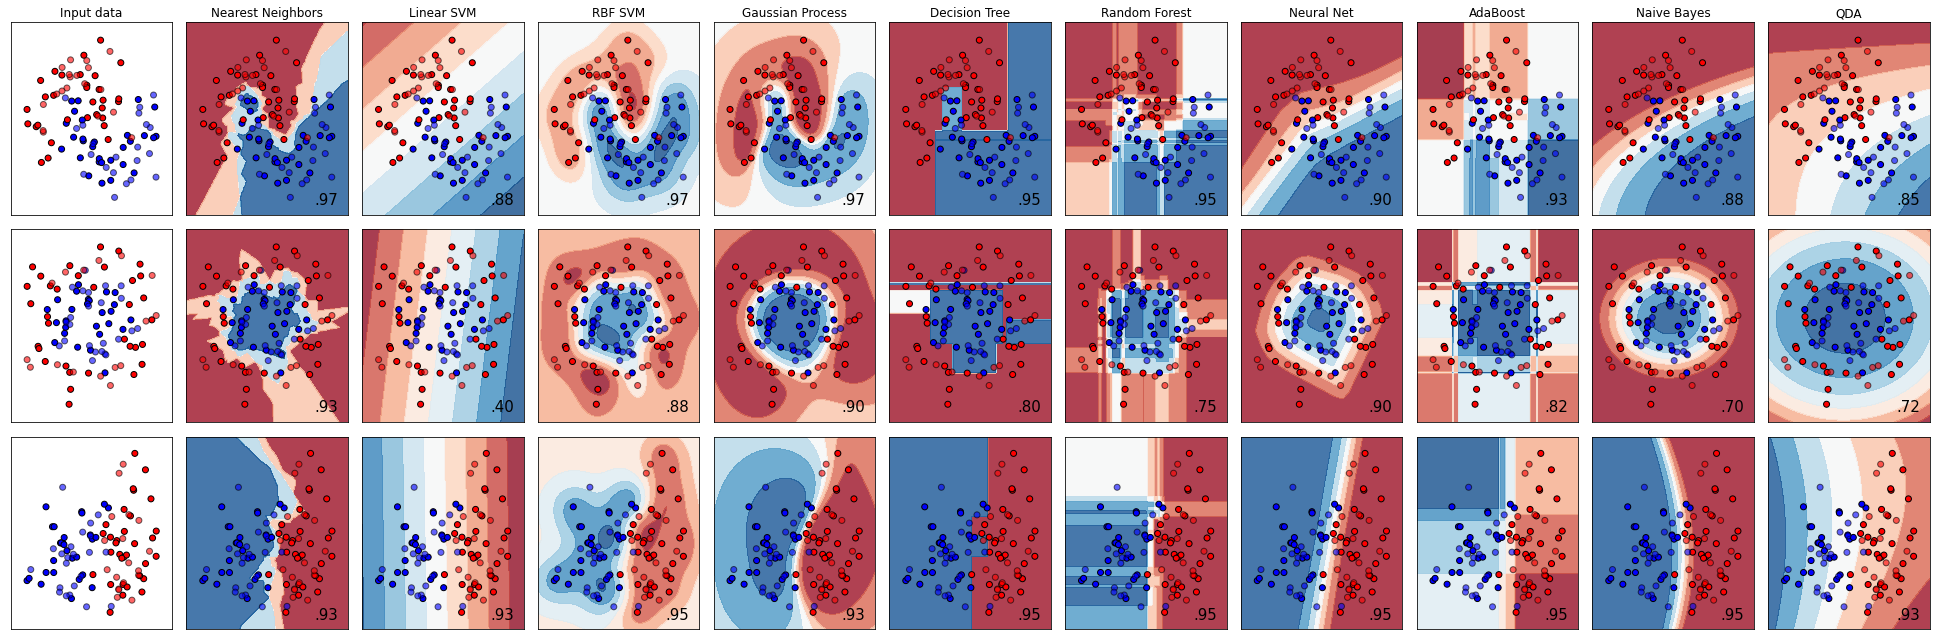

In [1]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

### Binary Logistic Classification

First, let's import some libraries.

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

from scipy.stats import multivariate_normal
from scipy.special import expit
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

Next, let's write a class for the logistic classifier. We only need to lightly modify the LinearRegressionGradient class from our last class session to use the sigmoid function. 


In [12]:
class LogisticClassifierGradient:
        
    # fit the model to the data
    def fit(self, X, y, w0, alpha, h, tolerance, max_iterations):
        
        # save the training data
        X = np.hstack((np.ones([X.shape[0], 1]), X))
        
        # standardize the data
        X = scale(X)
        
        # find the w values that minimize the sum of squared errors via gradient descent
        L = lambda w: (expit(X @ w).T - y.T) @ (expit(X @ w) - y)
        self.w = self.gradientDescent(L, w0, alpha, h, tolerance, max_iterations)
                
    # predict the output from testing data
    def predict(self, X):        
        # append a column of ones at the beginning of X
        X = np.hstack((np.ones([X.shape[0],1]), X))
        
        # standardize the data
        X = scale(X)
        
        # return the predicted y's
        return expit(X @ self.w)

    # run gradient descent to minimize the loss function
    def gradientDescent(self, f, x0, alpha, h, tolerance, max_iterations):
        # set x equal to the initial guess
        x = x0

        # take up to maxIterations number of steps
        for counter in range(max_iterations):
            # update the gradient
            gradient = self.computeGradient(f, x, h)

            # stop if the norm of the gradient is near 0
            if np.linalg.norm(gradient) < tolerance:
                print('Gradient descent took', counter, 'iterations to converge')
                print('The norm of the gradient is', np.linalg.norm(gradient))
                
                # return the approximate critical value x
                return x

            # if we do not converge, print a message
            elif counter == max_iterations - 1:
                print("Gradient descent failed")
                print('The gradient is', gradient)
                
                # return x, sometimes it is still pretty good
                return x

            # take a step in the opposite direction as the gradient
            x -= alpha*gradient
            
    # estimate the gradient
    def computeGradient(self, f, x, h):
        n = len(x)
        gradient = np.zeros(n)
        
        # compute f at current point
        fx = f(x)

        # find each component of the gradient
        for counter in range(n):
            xUp = x.copy()
            xUp[counter] += h
            gradient[counter] = (f(xUp) - fx)/h

        # return the gradient
        return gradient

### Breast Cancer Classification

Gradient descent failed
The gradient is [ 0.         -0.05511907 -0.06421433 -0.06401178 -0.0137604   0.00889166
 -0.08887002  0.01093417  0.06007347 -0.00932178  0.02727904  0.07478513
 -0.08429069 -0.03226684  0.11450169  0.02214635  0.03951513  0.0450363
 -0.03396567 -0.03353765 -0.0435814   0.06219088  0.16752023  0.00499243
  0.1011915   0.01903245 -0.03226864  0.01575291  0.11439018  0.04521775
 -0.04788594]

Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       158
           1       1.00      1.00      1.00       268

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

Test Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.85      0.88        54
           1       0.91      0.96      0.93        89

    accuracy                 

<Axes: >

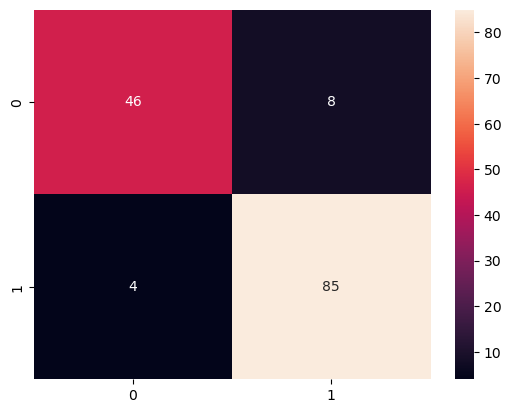

In [23]:
# read the breast cancer dataset
breast_cancer_data = datasets.load_breast_cancer()

# find the data and labels
X = breast_cancer_data.data
Y = breast_cancer_data.target

# do a train/test split 
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.25)

# build the logistic classifier
model = LogisticClassifierGradient()

# fit the Bayes classifier to the training data 
model.fit(trainX, trainY,
          [0] * (X.shape[1] + 1), alpha=0.001, h=0.001,
          tolerance=0.001, max_iterations=10000)

# predict the Labels of the training set 
predictedY = np.rint(model.predict(trainX))

# print quality metrics 
print(f'\nTrain Classification Report: \n {classification_report(trainY, predictedY)}')

# predict the Labels of the test set 
predictedY = np.rint(model.predict(testX))

# print quality metrics 
print(f'Test Classification Report: \n {classification_report(testY, predictedY)}')

print('Train Confusion Matric: \n')

sn.heatmap(confusion_matrix(testY, predictedY), annot=True)

## Lecture 6

The approach to making neural networks learn is very similar to the gradient-based learning approach we used previously, but the scale of large neural networks requires us to adjust certain parts of it. There are four main bits of code we need to make neural nets work:

1. **Forward pass**: feeds a datapoint into a neural network and processes it by computing the outputs of each layer of artificial neurons until we reach the output layer and compute the loss

2. **Loss**: after feeding in some labeled data, we can compute the loss function measuring the network's training error.

3. **Backpropagation (Backprop)**: uses the chain rule from calculus in a systematic way to find the gradient of the loss function.

4. **Gradient descent**: at each iteration, nudge the weights in the opposite direction of the gradient.

#### Note: *Stochastic* Gradient Descent (SGD)

We will discuss and add SGD next week. It speeds up gradient descent by making weight updates more frequently--based on samples of the training data rather than the entire dataset. SGD is critical for large neural networks to operate properly, but we will avoid scaling up too much this week.

### The Forward Pass

The forward pass is simple, we just follow the simple rules of the individual neurons, but we have to do it **many** times, which we can automate with matrix multiplication.

### Loss

The loss function can be computed quite simply in the same way as we did last week. However, we may want to add weight decay or other features to the loss function or we may want to use a different loss function entirely.

### Backpropagation

In the past, we approximated the gradient by computing the loss functions many times, perturbed in each dimension to compute

$$\nabla L(w)\approx\left(\frac{L(w+he_0)-L(w)}{h}, ..., \frac{L(w+he_d)-L(w)}{h}\right)$$

for some small value $h$, but this meant we had to compute the loss function $d+1$ times for **each** iteration in gradient descent, which required us to compute the outputs of the model for the whole dataset many, many times. This was fine for the linear regression models we have considered, but it would be too computationally expensive to feed the whole dataset through a neural network so many times.

As a result, we instead need another method to compute gradients. It turns out, we can systematically apply the chain rule to get formulas for the partial derivatives of the loss function with respect to each weight in the neural network. Backpropagation does just this.

### Gradient Descent

As we have seen before, gradient descent is an iterative learning algorithm that aims to minimize the loss function. It iteratively nudges the weights in the opposite direction of the gradients of the loss function.